# Goal

As app development consultants, we aim to analyze how specific characteristics can impact an app's popularity, guiding our strategies for optimal development and market success.

# Hypothesis

#### Null hypotheses:

Free - Paid:
       The majority of the apps are not free.

App size - App rating:
       The size of the app does not influence the rating.

Number of installs - App size:
       The size of the app does not influence the No. installs.

App rating - Number of installs:
       The apps with more installs don’t have higher rating. 

# Importing modules/ dataset

In [1]:
# code to ensure that any changes made to the module files are reflected in the Jupyter Notebook upon import
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import cleaning
from cleaning import cleaning
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
file_name = 'googleplaystore.csv'
df = pd.read_csv(file_name)

# Data Cleaning

In [4]:
df = cleaning(df)

/Users/dimitratsagkalidou/Documents/dimi/Data_Analysis/IronHack/Unit_4/Day_1/Quest/cleaning.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Rating"] = df["Rating"].astype(float)
/Users/dimitratsagkalidou/Documents/dimi/Data_Analysis/IronHack/Unit_4/Day_1/Quest/cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Reviews"] = df["Reviews"].astype(int)
/Users/dimitratsagkalidou/Documents/dimi/Data_Analysis/IronHack/Unit_4/Day_1/Quest/cleaning.py:17: SettingWithCopyWarning: 
A value is try

In [5]:
def size_to_megabytes(size):
    if 'M' in size:
        # Convert from M to float
        return float(size.replace('M', ''))
    elif 'k' in size:
        # Convert from k to float and divide by 1024 to convert to M
        return float(size.replace('k', '')) / 1024
    elif size == 'Varies with device':
        return np.nan
    else:
        return np.nan

In [6]:
df['Size_MB'] = df['Size'].apply(size_to_megabytes)

In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,2.8


# Exporting for SQL

In [ ]:
# character needs to be replaced, there is error with encoding and this character
df['App'] = df['App'].str.replace('\u2013', '-')

In [ ]:
problematic_rows = df[df['App'].str.contains('\u2013', na=False)]

# Print the rows where the problematic character is located in the "app" column
print("Rows where the en dash character is located in the 'app' column:")
print(problematic_rows)

In [ ]:
# specifying the encoding, to facilitate the import to SQL
df.to_csv("FINAL_clean_file_googleplaystore.csv", encoding="utf-8")

# Importing use reviews

In [ ]:
file_name = 'FINAL_clean_file_googleplaystore_user_reviews.csv'

In [ ]:
df_user_reviews = pd.read_csv(file_name)

In [ ]:
print(df_top_genres.columns)
print(df_user_reviews.columns)

In [ ]:
merged_df = pd.merge(df_top_genres, df_user_reviews, on='App')

In [ ]:
merged_df = merged_df.drop_duplicates()

# Dataframe with top genres

In [19]:
genre_counts = df['Genres'].value_counts()

top_5_genres = genre_counts.head(5)

print(top_5_genres)

df_genres = top_5_genres.reset_index()

df_top_genres = df[df['Genres'].isin(df_genres["Genres"])]

Genres
Tools            842
Entertainment    623
Education        549
Medical          463
Business         460
Name: count, dtype: int64


In [ ]:
df = df[df["Rating"] != 0.0]

# Data Visualization and Interpreting Results

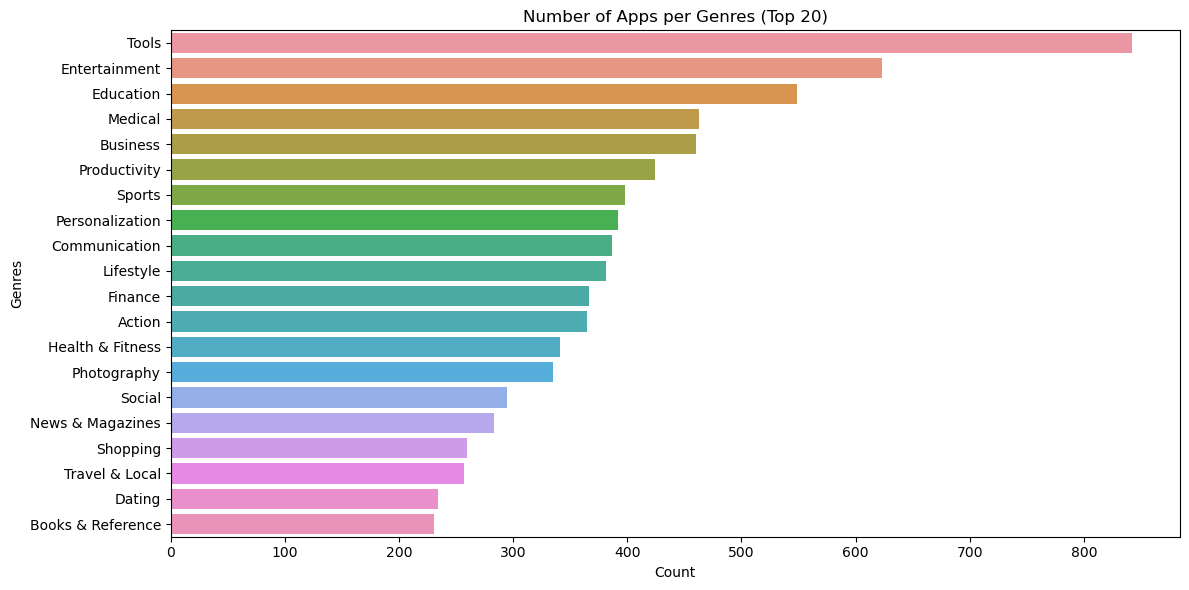

In [13]:
plt.figure(figsize=(12, 6))
top_genres = df['Genres'].value_counts().nlargest(20).index
sns.countplot(data=df, y='Genres', order=top_genres)
plt.title('Number of Apps per Genres (Top 20)')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

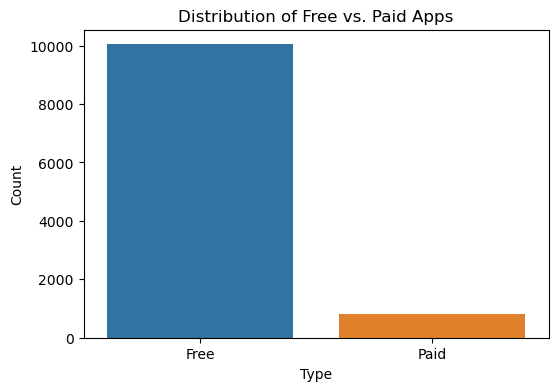

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Type')
plt.title('Distribution of Free vs. Paid Apps')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

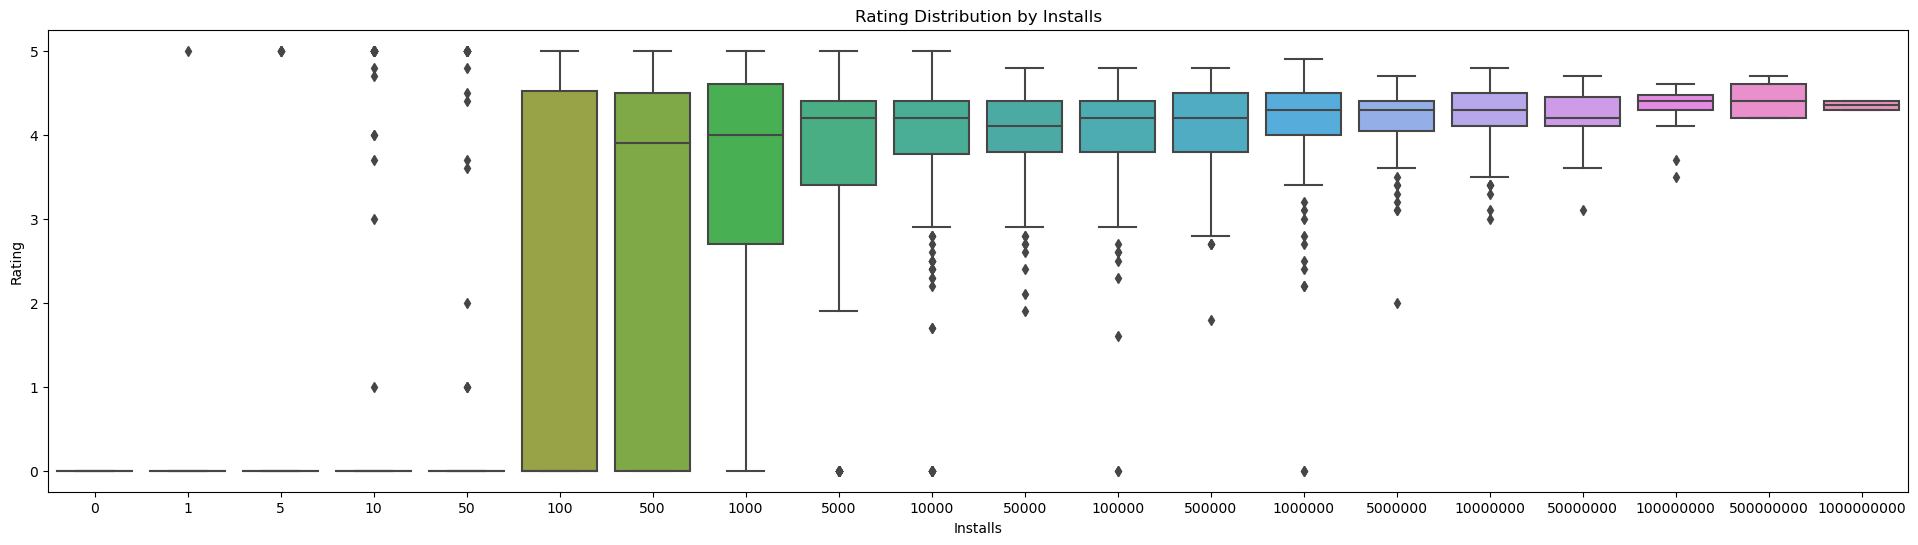

In [21]:
plt.figure(figsize=(24, 6))
sns.boxplot(data=df_top_genres, x='Installs', y='Rating')
plt.title('Rating Distribution by Installs')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.show()

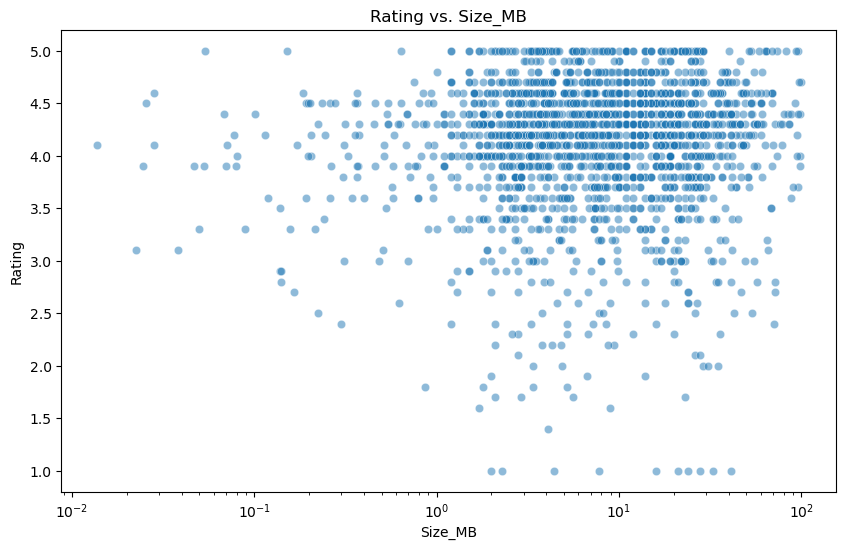

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_genres[df_top_genres["Rating"] != 0.0], x='Size_MB', y='Rating', alpha=0.5)
plt.title('Rating vs. Size_MB')
plt.xlabel('Size_MB')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()